# Regresion Lineal

CONSULTAR LA IMPLEMENTACION DEL REGRESOR LINEAL CON SKLEARN

La implementación de un Regresor Lineal con la librería Scikit-learn (sklearn) en Python sigue un flujo de trabajo estándar en Machine Learning.

 1. Preparación del Entorno y Datos
Importar Librerías

Para manejar datos, operaciones numéricas y el modelo de regresión:

*from sklearn.linear_model import LinearRegression*
*from sklearn.model_selection import train_test_split*
*from sklearn.metrics import r2_score, mean_squared_error*
*Otras librerías como pandas y numpy*

Cargar y Dividir Datos:
El dataset se carga (por ejemplo, desde un archivo CSV) y se separa en:
X: Variables predictoras
y: Variable objetivo

Separar Datos en Entrenamiento y Prueba:
Se usa train_test_split para dividir los datos en:
- Conjunto de entrenamiento: el modelo aprende
- Conjunto de prueba: se evalúa su rendimiento en datos no vistos

 2. Creación y Entrenamiento del Modelo
Instanciar el Modelo

Se crea un objeto del modelo de regresión lineal:

*regressor = LinearRegression()*

Entrenamiento
El modelo se ajusta a los datos de entrenamiento usando .fit(). Este proceso utiliza Mínimos Cuadrados Ordinarios (OLS) para encontrar:
- los coeficientes (pendientes)
- el intercepto (bias)
que minimizan la suma de los errores cuadrados.

 3. Predicción y Evaluación
Predicción

Se utiliza el modelo entrenado para predecir valores en el conjunto de prueba:

*𝑦pred = regressor.predict(𝑋test)*

Evaluación del Rendimiento:
Se usan métricas de regresión para evaluar la calidad del modelo:
- R² (Coeficiente de Determinación):
Indica cuánta varianza de la variable objetivo es explicada por el modelo.
Un valor cercano a 1.0 es ideal.
- MSE (Error Cuadrático Medio):
Mide el promedio de los errores al cuadrado.
Mientras más bajo, mejor.

*r2 = r2_score(y_test, y_pred)*
*mse = mean_squared_error(y_test, y_pred)*

Acceso a los Parámetros del Modelo

Sklearn permite acceder fácilmente a los parámetros aprendidos:
- Coeficientes (Pendientes)
regressor.coef_
- Intercepto (Bias o Ordenada al Origen)
regressor.intercept_

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

IMPLEMENTAR EL REGRESOR LINEAL DEL PROBLEMA VISTO EN CLASE, IMPLEMENTANDO SKLEARN

In [17]:
df=pd.read_csv('bmi.csv')
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

print("Primeras filas del dataset después de mapear Gender:\n")
print(df.head())

X = df[['Gender', 'Height', 'Weight']].values
y = df['Index'].values.ravel()

# Escalado (muy importante para SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Primeras filas del dataset después de mapear Gender:

   Gender  Height  Weight  Index
0       0     174      96      4
1       0     189      87      2
2       1     185     110      4
3       1     195     104      3
4       0     149      61      3


In [12]:
epochs = 50

reg = SGDRegressor(
    loss='squared_error', 
    max_iter=1,           # 1 iteración por llamada a fit()  (SGD)
    learning_rate='constant',
    eta0=0.001,             # tasa de aprendizaje
    penalty=None,          
    warm_start=True,       # permite entrenar por épocas manuales
    random_state=42,
    tol=None
)
# ESTO ES SKLEARN⬆

costs = []

print("Comenzando entrenamiento...\n")
for epoch in range(epochs):
    
    # ⬇SKLEARN: ENTRENAMIENTO⬇
    reg.fit(X_scaled, y)

    # ⬇SKLEARN: PREDICCIÓN⬇
    y_pred = reg.predict(X_scaled)

    mse = np.mean((y - y_pred)**2)
    costs.append(mse)

    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch + 1}: MSE = {mse:.6f}")


Comenzando entrenamiento...

Época 10: MSE = 0.319260
Época 20: MSE = 0.318717
Época 30: MSE = 0.318718
Época 40: MSE = 0.318718
Época 50: MSE = 0.318718


REPORTE LOS PESOS W, EL BIAS Y LOS COSTOS 

In [13]:
print(" REPORTE FINAL ")
print("Pesos W:", reg.coef_)
print("Bias b:", reg.intercept_[0])
print(f"Costo (MSE) Final: {costs[-1]:.6f}")

# Tabla de costos
cost_table = pd.DataFrame({
    "Epoch": np.arange(1, epochs + 1),
    "Costo (MSE)": costs
})

print("\nLista completa de costos (MSE por época):")
print(cost_table.to_string(index=False))

 REPORTE FINAL 
Pesos W: [-0.01478843 -0.57024153  1.08720932]
Bias b: 3.7517951534186813
Costo (MSE) Final: 0.318718

Lista completa de costos (MSE por época):
 Epoch  Costo (MSE)
     1     6.026246
     2     2.410884
     3     1.084867
     4     0.598813
     5     0.420830
     6     0.355769
     7     0.332054
     8     0.323451
     9     0.320357
    10     0.319260
    11     0.318880
    12     0.318755
    13     0.318718
    14     0.318710
    15     0.318710
    16     0.318712
    17     0.318714
    18     0.318716
    19     0.318716
    20     0.318717
    21     0.318717
    22     0.318718
    23     0.318718
    24     0.318718
    25     0.318718
    26     0.318718
    27     0.318718
    28     0.318718
    29     0.318718
    30     0.318718
    31     0.318718
    32     0.318718
    33     0.318718
    34     0.318718
    35     0.318718
    36     0.318718
    37     0.318718
    38     0.318718
    39     0.318718
    40     0.318718
    41     0.318718

In [14]:
print("RESULTADOS FINALES ")
print("Pesos W:", reg.coef_)
print("Bias b:", reg.intercept_)
print(f"Costo (MSE) Final: {costs[-1]:.6f}")

RESULTADOS FINALES 
Pesos W: [-0.01478843 -0.57024153  1.08720932]
Bias b: [3.75179515]
Costo (MSE) Final: 0.318718


GRAFIQUE LOS COSTOS VS LAS EPOCHS

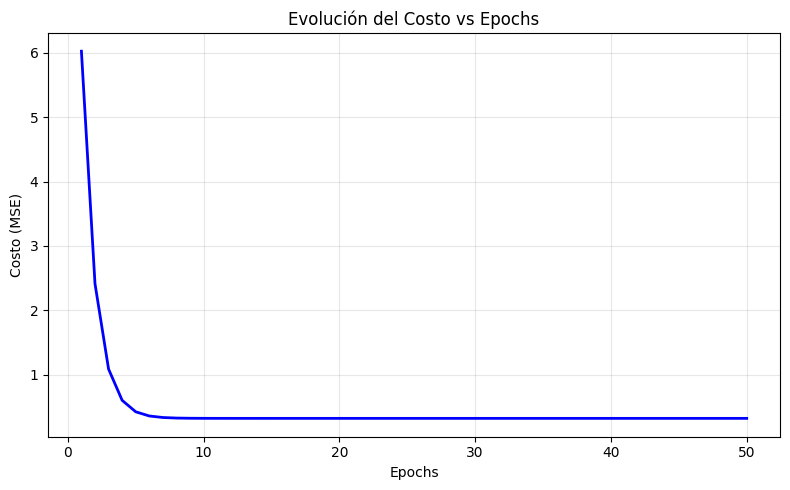

In [15]:
# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), costs, 'b-', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Costo (MSE)")
plt.title("Evolución del Costo vs Epochs")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


PRESENTE LAS METRICAS DE REGRESION CON SU RESPECTIVA INTERPRETACION 

In [16]:
y_pred_final = reg.predict(X_scaled)

mse_final = mean_squared_error(y, y_pred_final)
mae_final = mean_absolute_error(y, y_pred_final)
r2_final = r2_score(y, y_pred_final)

print("\n===== MÉTRICAS DEL MODELO =====")
print(f"MSE (Error cuadrático medio): {mse_final:.4f}")
print(f"MAE (Error absoluto medio): {mae_final:.4f}")
print(f"R2 (Coeficiente de determinación): {r2_final:.4f}")

print("\nInterpretación:")
print("• MSE: mide el error cuadrático; mientras menor, mejor.")
print("• MAE: error promedio simple; también debe ser bajo.")
print("• R2: qué tanto del comportamiento real explica el modelo (1 = perfecto).")


===== MÉTRICAS DEL MODELO =====
MSE (Error cuadrático medio): 0.3187
MAE (Error absoluto medio): 0.4519
R2 (Coeficiente de determinación): 0.8261

Interpretación:
• MSE: mide el error cuadrático; mientras menor, mejor.
• MAE: error promedio simple; también debe ser bajo.
• R2: qué tanto del comportamiento real explica el modelo (1 = perfecto).


SIMULE UNA MUESTRA NUEVA (COMO SI FUERA UN PACIENTE NUEVO) Y HAGA PREDICCION CON EL ALGORITMO ENTRENADO

In [ ]:
print("\n PREDICCIÓN NUEVO PACIENTE ")
nuevo_paciente = np.array([[1, 1.65, 70]])  # mujer, 1.65m, 70kg
nuevo_escalado = scaler.transform(nuevo_paciente)
prediccion = reg.predict(nuevo_escalado)
print("\n")
print(f"Datos paciente: Gender={nuevo_paciente[0,0]}, Height={nuevo_paciente[0,1]}, Weight={nuevo_paciente[0,2]}")
print(f"Predicción del índice: {prediccion[0]:.2f}")


 PREDICCIÓN NUEVO PACIENTE 
Datos paciente: Gender=1.0, Height=1.65, Weight=70.0
Predicción del índice: 8.42
